In [12]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
from demo_pose_NMS import *
from scipy import misc
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Run poses level NMS
provide an image and the corresponding ssd bounding box detection results and pose prediction results\n
"filedir" is the directory which contains following files:

 demo.h5,  which containing the pose prediction results and scores  for each keypoints
 
 demo_bbox.h5,  which contains the bbox imformation of ssd detection. It is composed of the "xmax", "xmin", "ymax", "ymin". 
 
 index.txt,   which contains the number of bbox in a image. This is useful when there are more than one image to be predicted.
 

In [13]:
filedir = "..."
#read an image
image = plt.imread("023360775.jpg")
plt.imshow(image)
currentAxis = plt.gca()
#run pose level NMS with threshold of number of match keypoints
matchThreds = 5
PCK_NMS(filedir, matchThreds)

## Draw the prediction results

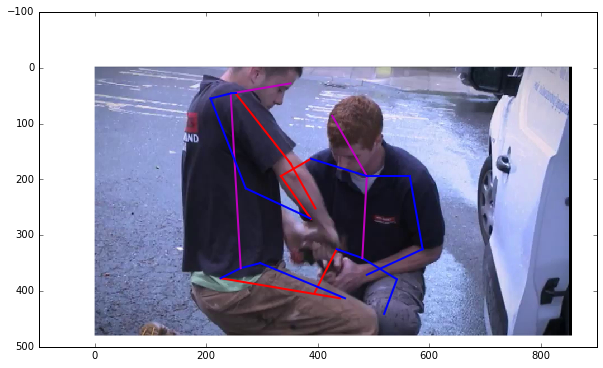

In [18]:

os.chdir("{}/PCK-pose-NMS/matchThreds{}/scoreThreds0.5".format(filedir, matchThreds))

preds = [line.rstrip('\n').rstrip('\r').rstrip(' ') for line in open("pred.txt")]
scores = [line.rstrip('\n').rstrip('\r').rstrip(' ') for line in open("scores.txt")]

#pair keyppoint ids
pairRef = [[1,2], [2,3],[3,7],
           [4,5], [4,7], [5,6], 
           [7,9], [9,10],
           [14,9],[11,12],[12,13],
           [13,9],[14,15],[15,16] ];
partColor = [1,1,1,2,2,2,0,0,0,0,3,3,3,4,4,4];
Colors = ['m', 'r', 'b', 'r', 'b']

#draw predicted pose
for i in xrange(len(preds)):
    pred = preds[i].split('\t')
    score = scores[i].split('\t')
    for point_pair in pairRef:
        x1 = float(pred[2*point_pair[0]-1]); y1 = float(pred[2*point_pair[0]])
        x2 = float(pred[2*point_pair[1]-1]); y2 = float(pred[2*point_pair[1]])
        s1 = float(score[point_pair[0]]); s2 = float(score[point_pair[1]])
        if (s1 < 0.15 or s2 < 0.15):
            continue
        Color = Colors[partColor[point_pair[0]]]
        plt.plot([x1,x2], [y1,y2], color = Color, lw = 2)
